In [126]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [125]:
import pandas as pd

In [ ]:
!pip install ivis

     |████████████████████████████████| 655kB 10.6MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391652 sha256=355dfa969deadcb9826ad6bae2b9fa22801bd8a2b72300f10c1f11007152dbb0
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy


In [127]:
from ivis import Ivis
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import roc_auc_score, auc
import time

In [128]:
train_df = pd.read_csv("/gdrive/My Drive/Colab_Notebooks/Sentence-Analysis/input.csv")
test_df =pd.read_csv("/gdrive/My Drive/Colab_Notebooks/Sentence-Analysis/input_test.csv")

mappings = {1: 0, 2: 1, 3:2}

train_df.label = [mappings[item] for item in train_df.label]
train_df

,Unnamed: 0,patient_id,sequence,label
0,0,Z8399761,"(unclear history), venous insufficiency, PVD, ...",2
1,1,Z11957588,period. It apparently cuts car accident rates ...,0
2,2,Z10809276,(P) 5 Hearing: no concerns Vision: needs updat...,1
3,3,Z8539944,"remission, s/p 1 suicide attempt, 3 IPLOC admi...",2
4,4,Z12696803,should be pursued at that point in time. He an...,0
5,5,Z7552077,since the hospital visit. The patient is accom...,1
6,6,Z11702635,71 y.o. female with has a past medical history...,2
7,7,Z15548862,in the Memory Diagnostic Clinic at McLean Hosp...,2
8,8,Z7648831,on back wound with significant output per RN. ...,2
9,9,Z7701777,lobes bilaterally and left parietal lobe. Thes...,2


In [129]:
X = train_df["sequence"]
y = train_df["label"]

In [140]:
y_label = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3, stratify = y_label)

In [131]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english",analyzer='word')
tfidf_train= tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_train  = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_test  = pd.DataFrame(tfidf_test.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_train = tfidf_train.to_numpy()
tfidf_test = tfidf_test.to_numpy()

In [132]:
print(np.unique(y_test))

[0 1 2]


In [133]:
ivis = Ivis(embedding_dims=20, model='maaten',
           n_epochs_without_progress=5, 
            k =10, batch_size= 4 #deletee when get full gold standard dataset
            )
ivis.fit(tfidf_train, y_train.values)

100%|██████████| 14/14 [00:00<00:00, 139.66it/s]

Building KNN index
Extracting KNN neighbours


100%|██████████| 14/14 [00:00<00:00, 69.02it/s] 


Training neural network
Epoch 1/1000
4/4 [==============================] - 2s 37ms/step - loss: 1.6635 - stacked_triplets_loss: 1.6923 - supervised_loss: 1.6348
Epoch 2/1000
4/4 [==============================] - 0s 28ms/step - loss: 1.3752 - stacked_triplets_loss: 1.1777 - supervised_loss: 1.5728
Epoch 3/1000
4/4 [==============================] - 0s 29ms/step - loss: 3.2314 - stacked_triplets_loss: 1.6608 - supervised_loss: 4.8020
Epoch 4/1000
4/4 [==============================] - 0s 27ms/step - loss: 2.8343 - stacked_triplets_loss: 1.1559 - supervised_loss: 4.5127
Epoch 5/1000
4/4 [==============================] - 0s 27ms/step - loss: 1.5559 - stacked_triplets_loss: 1.5621 - supervised_loss: 1.5497
Epoch 6/1000
4/4 [==============================] - 0s 30ms/step - loss: 2.4162 - stacked_triplets_loss: 3.7648 - supervised_loss: 1.0676
Epoch 7/1000
4/4 [==============================] - 0s 31ms/step - loss: 1.6486 - stacked_triplets_loss: 1.2602 - supervised_loss: 2.0369


Ivis(annoy_index_path=None, batch_size=4, build_index_on_disk=True,
     callbacks=None, distance='pn', embedding_dims=20, epochs=1000, k=10,
     knn_distance_metric='angular', model='maaten', n_epochs_without_progress=5,
     neighbour_matrix=<ivis.data.neighbour_retrieval.knn.AnnoyKnnMatrix object at 0x7fdf19135750>,
     ntrees=50, precompute=True, search_k=-1,
     supervision_metric='sparse_categorical_crossentropy',
     supervision_weight=0.5, verbose=1)

In [134]:
train_embeddings = ivis.transform(tfidf_train)
test_embeddings = ivis.transform(tfidf_test)

2/2 [==============================] - 0s 10ms/step


In [135]:
print(test_embeddings)

[[-3.73573     0.25602937  1.3729056  -2.0936823  -1.4079608   1.372871
   1.4599705   2.1294692  -2.0895803   2.1815796   1.2485493   3.5546196
   0.06509355  1.1838202  -0.12119884 -0.42763966 -2.428567   -1.7644025
  -1.2199429   0.80226487]
 [-4.9713674   0.96132874  2.118471   -0.10799206 -0.29409894  0.66915005
   1.8416885   1.8352408  -0.63380677  1.6001326   1.3137836   4.0603027
   0.9752747  -0.81356764 -1.4823312  -0.02057452 -1.9949232  -1.139138
  -2.5237849   0.9672206 ]
 [-2.7066264   0.79853505  1.0242834  -0.24155593 -0.48519847  0.5426328
   0.9871025   0.83598024  0.1556343   0.6566955   0.05983492  2.4294765
   0.32721138  0.03484977 -0.69512063  0.10541297 -0.4292262  -1.3338422
  -1.402807    0.6735952 ]
 [-2.4891336   0.57790196  2.1074188  -1.1697868   0.5441521   0.68259025
   1.626296    1.2873281  -0.24906561  1.4649799   0.9091435   1.4336722
   0.7252251  -0.16994154 -1.1569254   0.5939237  -0.6423334  -0.59816915
  -1.8565581   1.5787065 ]
 [-3.6049347   

Text(0.5, 1.0, 'Testing Set')

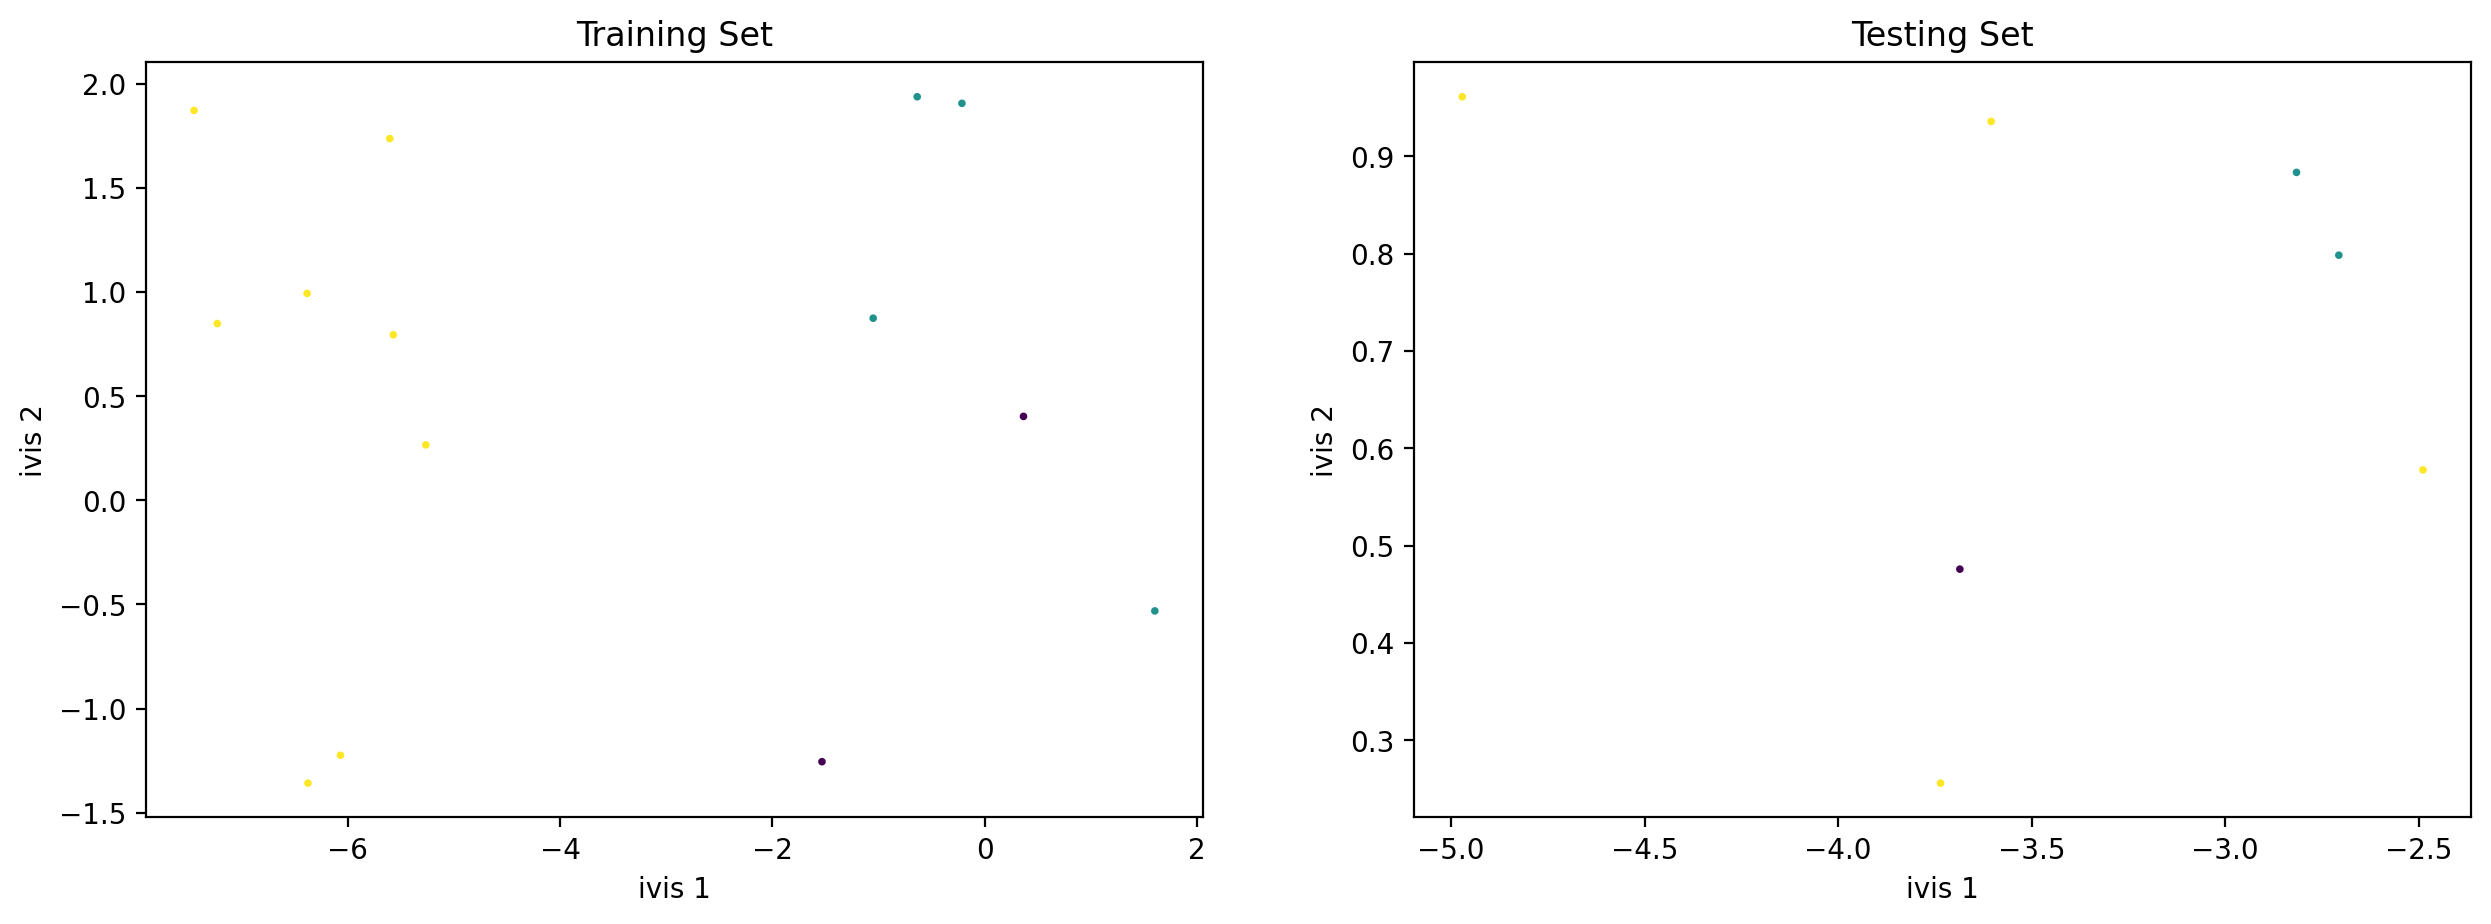

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=200)
ax[0].scatter(x=train_embeddings[:, 0], y=train_embeddings[:, 1], c=y_train, s=3)
ax[0].set_xlabel('ivis 1')
ax[0].set_ylabel('ivis 2')
ax[0].set_title('Training Set')

ax[1].scatter(x=test_embeddings[:, 0], y=test_embeddings[:, 1], c=y_test, s=3)
ax[1].set_xlabel('ivis 1')
ax[1].set_ylabel('ivis 2')
ax[1].set_title('Testing Set')

In [141]:
clf = LogisticRegression(solver="lbfgs").fit(train_embeddings, y_train)
labels = clf.predict(test_embeddings)
proba = clf.predict_proba(test_embeddings)

target_names = ['NO', 'NTR', 'YES']
results = classification_report(y_test, labels, target_names=target_names, output_dict=True)
results = pd.DataFrame(results).transpose()
print(results)



print('\nConfusion Matrix')
print(confusion_matrix(y_test, labels))
#print('Average Precision: '+str(average_precision_score(y_test, proba[:, 1])))
#print('ROC AUC: '+ str(roc_auc_score(y_test, labels, multi_class='ovr', average = 'macro')))

              precision    recall  f1-score   support
NO             0.000000  0.000000  0.000000  1.000000
NTR            0.000000  0.000000  0.000000  2.000000
YES            0.500000  0.750000  0.600000  4.000000
accuracy       0.428571  0.428571  0.428571  0.428571
macro avg      0.166667  0.250000  0.200000  7.000000
weighted avg   0.285714  0.428571  0.342857  7.000000

Confusion Matrix
[[0 0 1]
 [0 0 2]
 [0 1 3]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AxisError: ignored